# Titanic Dataset: Data Analysis

In this project we will explore the Titanic dataset trying to answer the following questions:
* Who were the passengers on the Titanic? (age, gender, class .. etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?
* What factors helped someone survive the sinking?

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#We import the Titanic dataset which is available on Kaggle
titanic_df = pd.read_csv(r'D:\Kaggle\titanic_train.csv')

In [6]:
#We continuie with the first rows and data description
titanic_df.head(20)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [9]:
#We can notice above that we have many missing values especially for "body" and "cabin". 
titanic_df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


We now have an intresting overview of the data. If we look at the mean of "survived" we can observe that only 37% of people survived (1 mean they survived, while 0 mean they died)

# Details about the passangers on Titanic 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


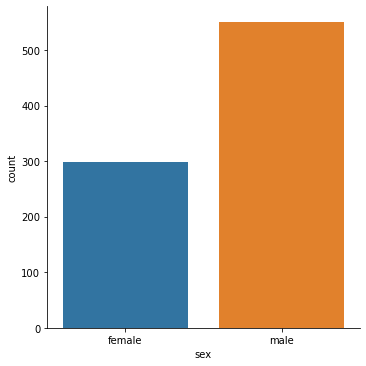

In [11]:
#Creating a factorplot, charting the number of male and female passengers
sns.catplot('sex',data=titanic_df,kind='count')

We can notice that the number of males is much higher than females

Let's see how are the passangers distributed according to their socio-economic status.
The variable "pclass" is used to indicate this status.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


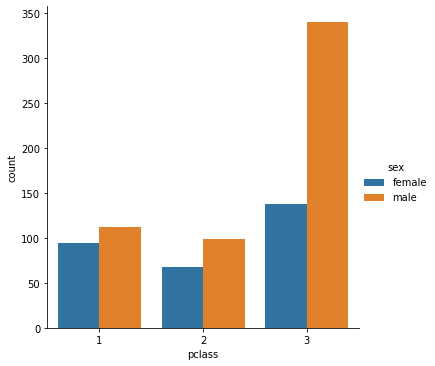

In [14]:
sns.catplot('pclass',data=titanic_df,hue='sex',kind='count')

We can notice that most of the people are part of the third class. But before, we should further divide the passangers between male, female and children.

In [15]:
def man_wom_chi(passenger):
    age=passenger['age']
    sex=passenger['sex']
    
    return 'child' if age < 14 else sex

#Using Pandas' apply method to create a new column "Person"
titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [16]:
#Looking at the first 10 rows in the dataset, to see if our method worked.
titanic_df[0:10]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,female
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,male
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,female
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,female
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,male
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0,male
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0,male
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1,female
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1,female
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0,female


In [17]:
#Getting the actual counts
print (titanic_df['Person'].value_counts())

male      510
female    270
child      70
Name: Person, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


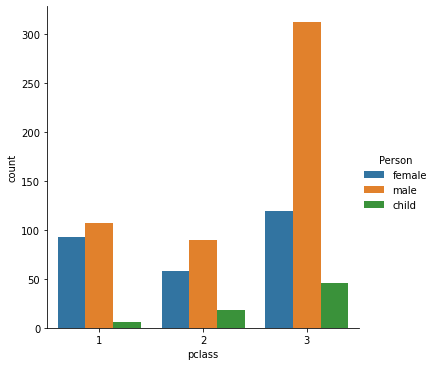

In [19]:
sns.catplot('pclass',data=titanic_df,hue='Person',kind='count')

<AxesSubplot:>

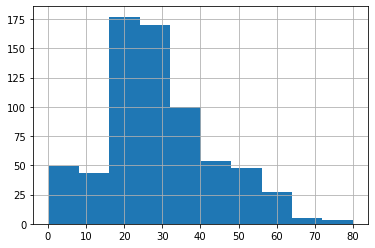

In [20]:
#We are using the following histogram to observe the distribution of age
titanic_df['age'].hist()

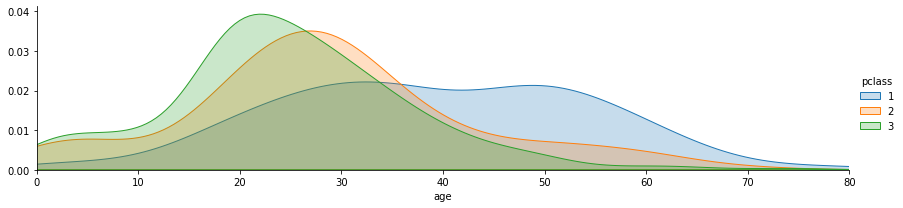

In [21]:
#We are now going to see the distribution of passangers according to age and class 

fig = sns.FacetGrid(titanic_df,hue='pclass',aspect=4)

fig.map(sns.kdeplot,'age',shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

We can notice that most of the people are young, with few children while many older people have a high socio-economic status.

#  Where did the passengers come from?
The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


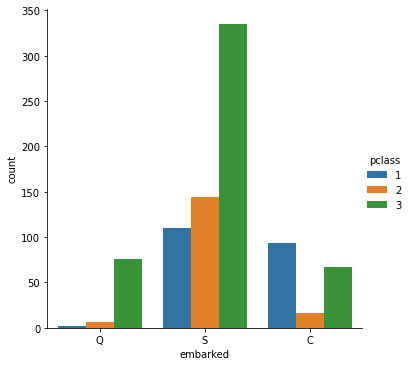

In [23]:
sns.catplot('embarked',data=titanic_df,hue='pclass',kind='count')

We can notice that most of the passangers come from Southampton. The numbers can give us an overall situation of the city as well, namely a high economic inequality. 

# Family

Most of the people on Titanic were not alone, but with friends or family. 

In [24]:
titanic_df.head(10)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,female
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,male
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,female
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,female
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,male
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0,male
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0,male
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1,female
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1,female
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0,female


For the next analysis we are going to use "sibsp" which refers to the number of siblings or spouses that a passenger had aboard and "parch" which refers to the number of parents or children someone had on the ship.

In [27]:
#Adding the number of family a passenger had onboard
titanic_df['Relatives'] = titanic_df.sibsp + titanic_df.parch


In [31]:
titanic_df.tail()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person,Relatives
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0,male,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0,male,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1,female,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0,child,2
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0,male,0


We created a new column "Relatives". Everything is above 0 mean that specific person had a relative on board. 

In [32]:
titanic_df['Relatives'].loc[titanic_df['Relatives']>0] = 'No'

titanic_df['Relatives'].loc[titanic_df['Relatives']==0] = 'Yes'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
titanic_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,Person,Relatives
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,female,Yes
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,male,Yes
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,female,No
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,female,No
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,male,Yes


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


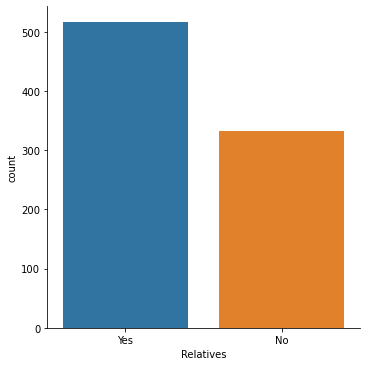

In [35]:
sns.catplot('Relatives',data=titanic_df,kind='count')

# What factors had a contribution to survival?

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


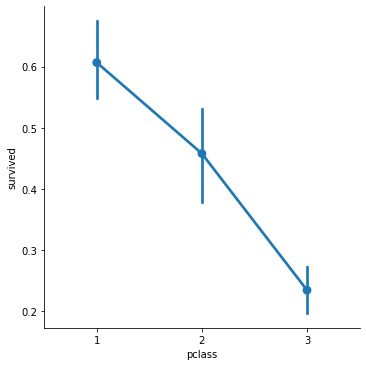

In [39]:
sns.factorplot( x= 'pclass', y= 'survived',data=titanic_df)

As we expected, the socio-economic status has a big impact on survival rate. We will now plot the results for gender.

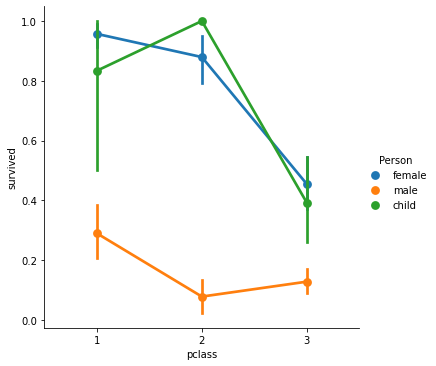

In [41]:
sns.factorplot('pclass','survived',hue='Person',data=titanic_df)

As we remember from the movie, females and children were given priority on taking the boats. Not surprisingly, most of the people who died were males.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


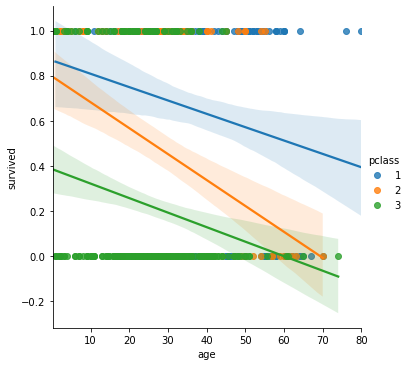

In [42]:
sns.lmplot('age','survived',hue='pclass',data=titanic_df)

It seems the survival chances were decreasing as the passanger were getting older regardless of their status.

The question is what is the impact of these variables on survival chances? In order to analyze this relation we are going to use the stargazer package (from R) in order to plot the impact of each variable.

In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [47]:
reg1 = ols("survived ~ pclass + Relatives + age", data = titanic_df).fit(cov_type = 'HC3')

In [48]:
stargazer = Stargazer([reg1])

In [49]:
HTML(stargazer.render_html())

We can see that all variables are statistically significant and negative in relation to survival chances.

* The older the passanger the lower the chances of survival
* The passanger had higher chances of survival if he/she was alone
* The lower the economic status, the lower the chance of survival. At the same time this is the most important variable that was influencing the chances of survival.